In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#Reduce the size of the images to reduce the model size. 128x128 = 812MB
#Rescale the image sizes to between 0 and 1
train_img_datagen = ImageDataGenerator(rescale=1./255)
val_img_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_img_datagen.flow_from_directory(
    '../input/vegtrainset',
    target_size=(64,64),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')

val_set = val_img_datagen.flow_from_directory(
    '../input/vegtestset',
    target_size=(64,64),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')

Found 997 images belonging to 4 classes.
Found 385 images belonging to 4 classes.


In [4]:
class_dict = {'flower': 0,'fruit': 1,'root': 2,'seed': 3}

class_names = list(class_dict.keys())

In [5]:
model = Sequential([
    Conv2D(filters=32, kernel_size=1, input_shape=(64,64,3)),
    Flatten(input_shape=(64, 64)), #flatten --> 3D to 2D
    Dense(16, activation='relu'),
    #Dense(2, activation='softmax')
    Dense(4,activation='softmax')
])

In [6]:
#Use BinaryCrossentropy for classification of 0 and 1
#https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [7]:
model_info = model.fit(train_set,batch_size=32, validation_data= val_set, epochs=5, shuffle=True)

model.summary()

Epoch 1/5
32/32 [==============================] - 8s 246ms/step - loss: 3.1951 - accuracy: 0.3076 - val_loss: 0.6446 - val_accuracy: 0.4701
Epoch 2/5
32/32 [==============================] - 4s 123ms/step - loss: 0.5936 - accuracy: 0.4057 - val_loss: 0.5892 - val_accuracy: 0.4987
Epoch 3/5
32/32 [==============================] - 4s 132ms/step - loss: 0.5447 - accuracy: 0.4812 - val_loss: 0.5856 - val_accuracy: 0.4831
Epoch 4/5
32/32 [==============================] - 4s 131ms/step - loss: 0.5108 - accuracy: 0.5191 - val_loss: 0.5550 - val_accuracy: 0.4519
Epoch 5/5
32/32 [==============================] - 4s 127ms/step - loss: 0.4879 - accuracy: 0.5134 - val_loss: 0.5881 - val_accuracy: 0.4260
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        128       
_________________________________________________________________
flatten (Fl

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


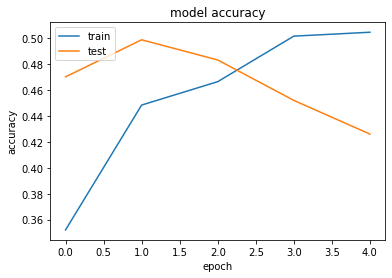

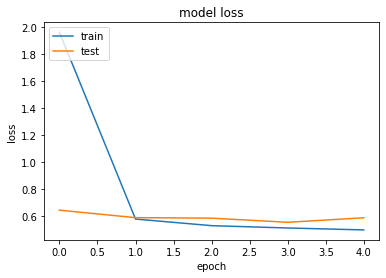

In [8]:
import matplotlib.pyplot as plt

# list all data in history
print(model_info.history.keys())

# summarize history for accuracy
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
model.save('VegRGBWorking.h5')

In [10]:
from keras.models import load_model
model = load_model('VegRGBWorking.h5')

In [11]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# dimensions of our images
img_width, img_height = 64, 64
images_dir = "../input/vegtestset"

{'Class': 'fruit', 'Probability': 0.8240817}


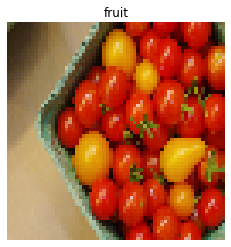

In [12]:
# predicting single image
image_path = "../input/validatedataset/Tomato2.jpg"
new_img = image.load_img(image_path, target_size=(img_width, img_height))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

#img_class = model.predict_classes(img) #returns ndim np_array
img_class = np.argmax(model.predict(img), axis=-1)
img_class_index = img_class.item() #extracting value(s)
classname = class_names[img_class_index]

#img_prob = model.predict_proba(img) #returns numpy array of class probabilities
img_prob = model.predict(img)
prediction_prob = img_prob.max()

pred_dict = {"Class":classname, "Probability":prediction_prob}
print(pred_dict)

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(classname)
plt.show()